Social media is the modern-day agora, where opinions are shared, debated, and sometimes even go viral. With the vast amount of data generated every second, understanding the sentiment behind these posts can provide valuable insights into public opinion and trends.

In this notebook, we will dive into a dataset of social media sentiments to uncover patterns and insights. We will explore the data, visualize trends, and even attempt to predict sentiment based on various features. If you find this notebook useful, please consider upvoting it.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load the dataset
file_path = '/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv'
df = pd.read_csv(file_path)

## Data Overview
Let's take a look at the first few rows of the dataset to understand its structure.

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


## Data Cleaning
We'll start by dropping unnecessary columns and checking for missing values.

In [5]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

# Check for missing values
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

## Exploratory Data Analysis
Let's explore the distribution of sentiments and other interesting aspects of the data.

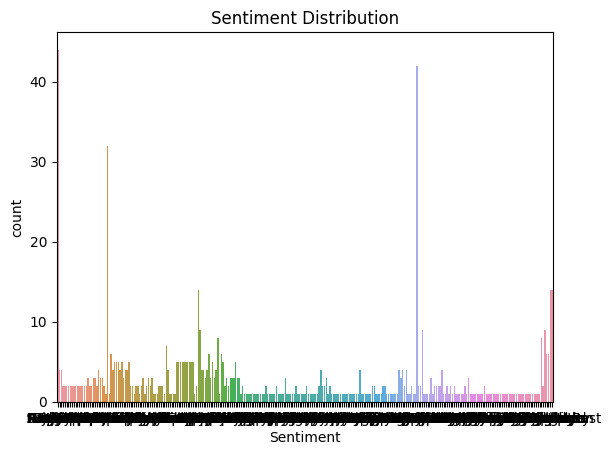

In [6]:
# Sentiment distribution
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

### Retweets and Likes
Let's see how retweets and likes are distributed across different sentiments.

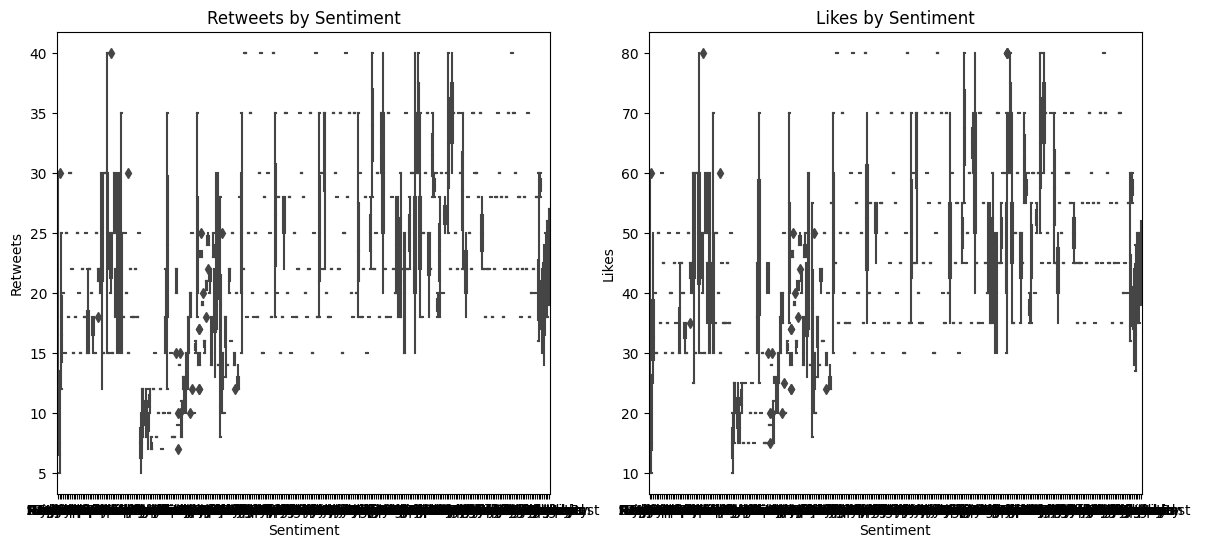

In [7]:
# Boxplot for Retweets and Likes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Sentiment', y='Retweets', data=df, ax=axes[0])
axes[0].set_title('Retweets by Sentiment')
sns.boxplot(x='Sentiment', y='Likes', data=df, ax=axes[1])
axes[1].set_title('Likes by Sentiment')
plt.show()

### Correlation Heatmap
Let's examine the correlation between numeric features.

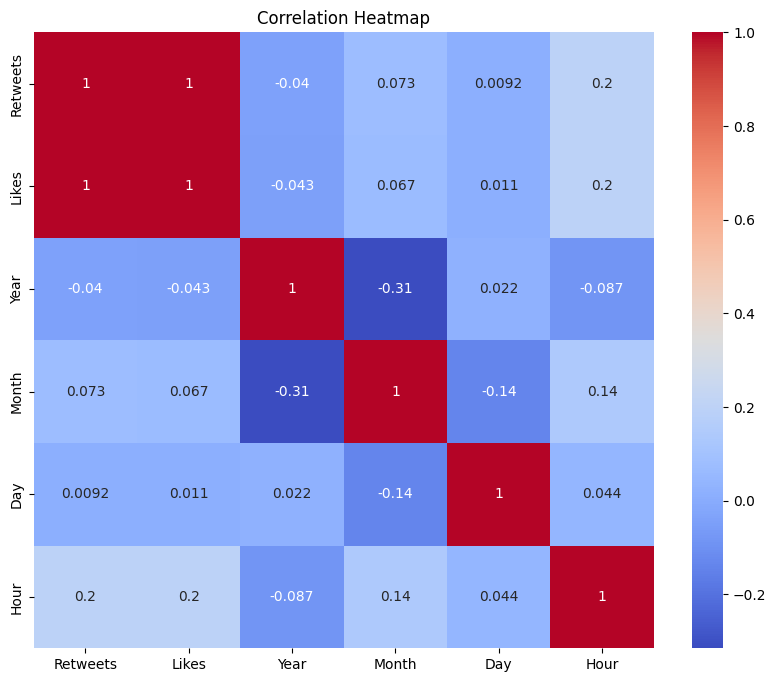

In [8]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Sentiment Prediction
We'll attempt to predict the sentiment of a post using a Naive Bayes classifier.

In [9]:
# Prepare data for modeling
X = df['Text']
y = df['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [10]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

### Model Evaluation
Let's evaluate the performance of our sentiment prediction model.

Accuracy: 0.14
                        precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
         Affection           0.00      0.00      0.00         1
      Ambivalence            0.00      0.00      0.00         1
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
        Arousal              0.00      0.00      0.00         3
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1
                  Bad        0.00      0.00      0.00         1
             Betrayal        0.00      0.00      0.00         2
        Betrayal             0.00      0.00      0.00         1
         Bitter         

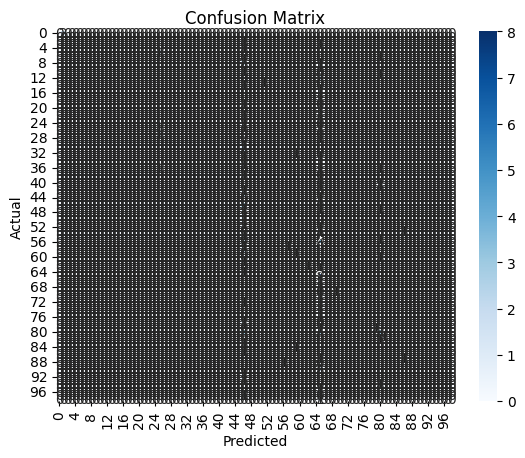

In [11]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Conclusion
In this notebook, we explored a social media sentiment dataset, visualized various aspects of the data, and built a sentiment prediction model. The Naive Bayes classifier provided a decent accuracy, but there is always room for improvement. Future analysis could involve exploring more sophisticated models, feature engineering, or even incorporating additional data sources.

If you found this notebook insightful, please consider upvoting it.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)